# Example Interrupted Time Series (ITS) with `pymc` models

This notebook shows an example of using interrupted time series, where we do not have untreated control units of a similar nature to the treated unit and we just have a single time series of observations and the predictor variables are simply time and month.

In [14]:
import arviz as az
import pandas as pd

import causalpy as cp

In [15]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
seed = 42

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Interrupted Time Series (ITS) Example

Load data

In [16]:
df = (
    cp.load_data("its")
    .assign(date=lambda x: pd.to_datetime(x["date"]))
    .set_index("date")
)

treatment_time = pd.to_datetime("2017-01-01")
df.head()

,month,year,t,y
date,,,,
2010-01-31,1,2010,0,25.058186
2010-02-28,2,2010,1,27.189812
2010-03-31,3,2010,2,26.487551
2010-04-30,4,2010,3,31.241716
2010-05-31,5,2010,4,40.753973


Run the analysis

:::{note}
The `random_seed` keyword argument for the PyMC sampler is not necessary. We use it here so that the results are reproducible.
:::

In [17]:
result = cp.InterruptedTimeSeries(
    df,
    treatment_time,
    formula="y ~ 1 + t + C(month)",
    model=cp.pymc_models.LinearRegression(sample_kwargs={"random_seed": seed}),
)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.
Sampling: [beta, sigma, y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]
Sampling: [y_hat]


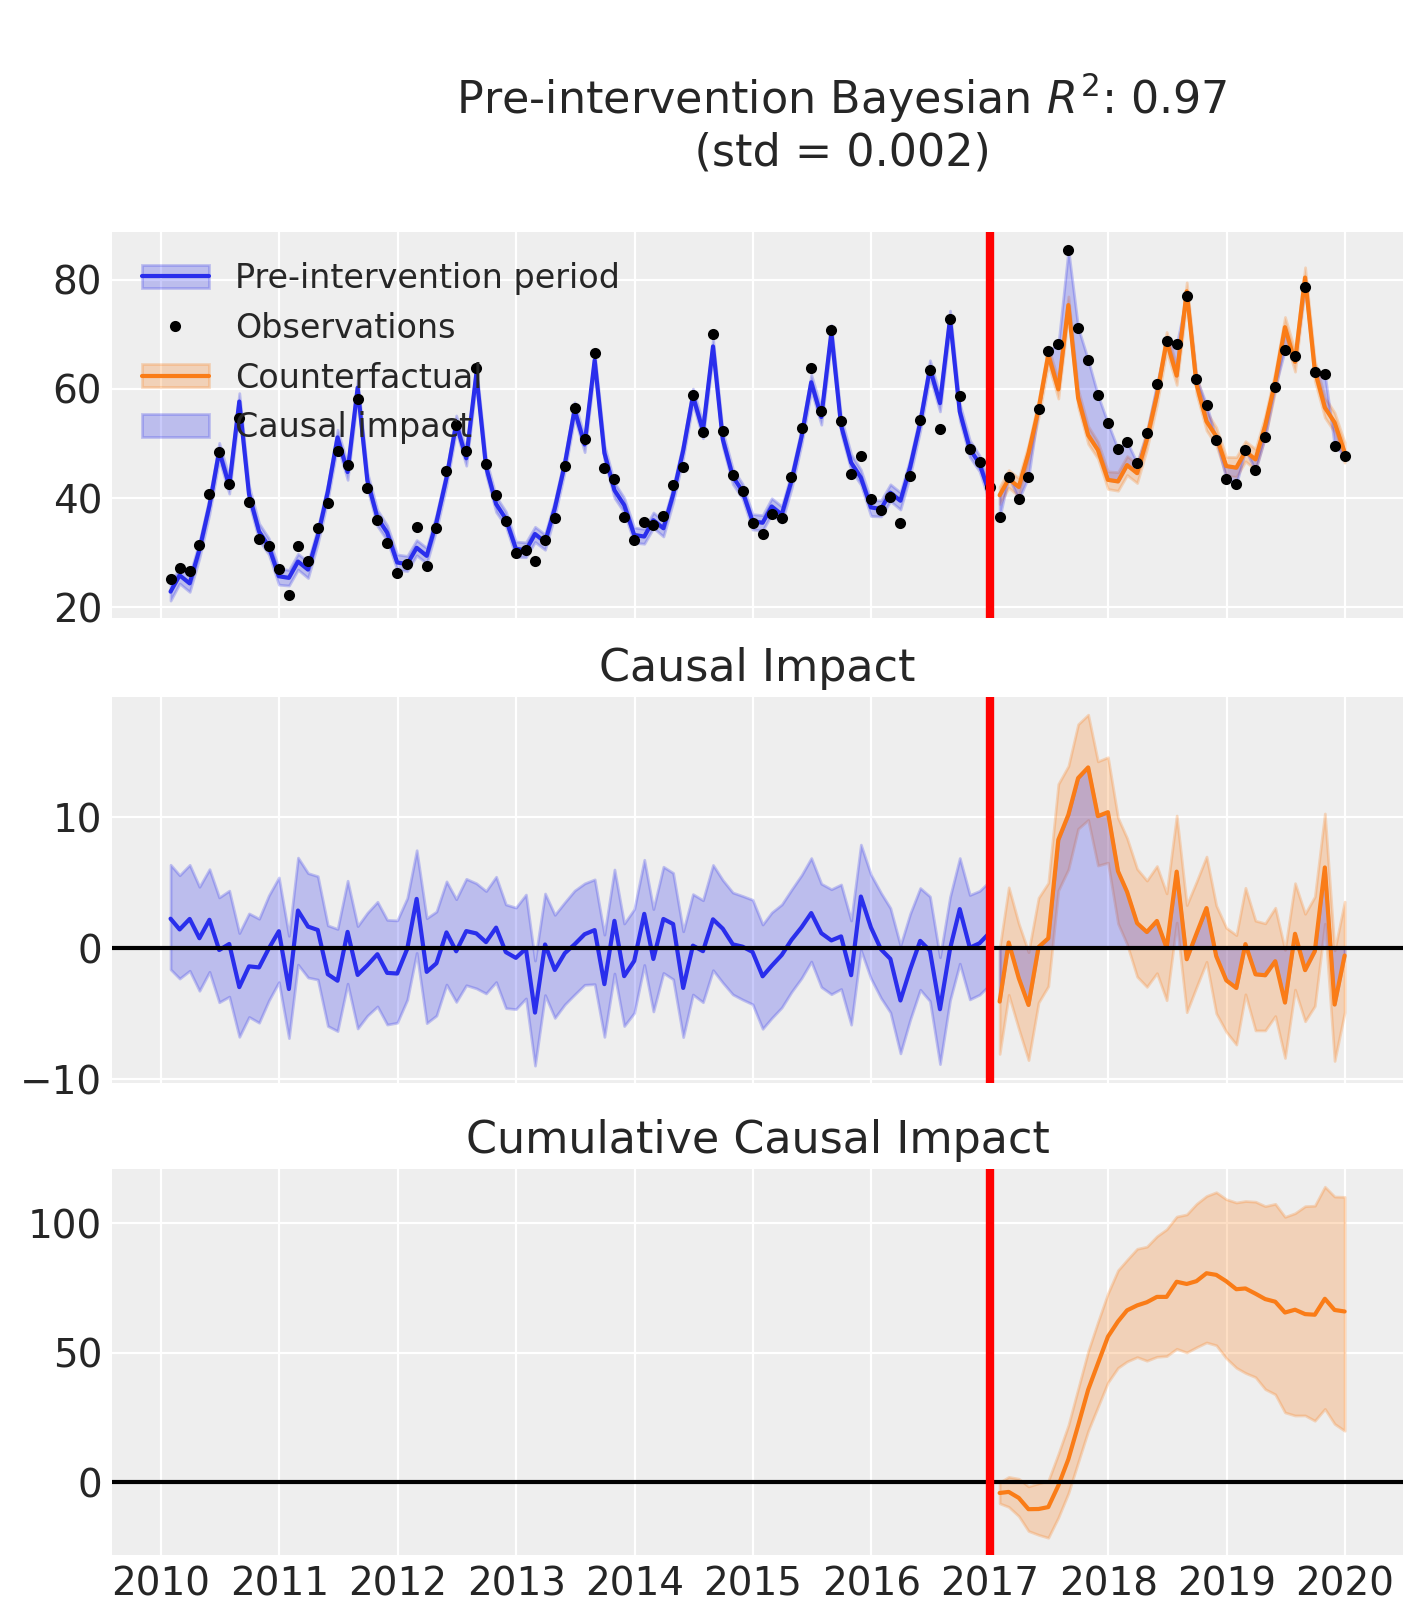

In [18]:
fig, ax = result.plot()

In [19]:
result.summary()

==================================Pre-Post Fit==================================
Formula: y ~ 1 + t + C(month)
Model coefficients:
    Intercept       23, 94% HDI [21, 24]
    C(month)[T.2]   2.8, 94% HDI [0.83, 4.7]
    C(month)[T.3]   1.1, 94% HDI [-0.94, 3]
    C(month)[T.4]   7.1, 94% HDI [5.1, 8.9]
    C(month)[T.5]   15, 94% HDI [13, 17]
    C(month)[T.6]   25, 94% HDI [23, 27]
    C(month)[T.7]   18, 94% HDI [16, 20]
    C(month)[T.8]   33, 94% HDI [31, 35]
    C(month)[T.9]   16, 94% HDI [14, 18]
    C(month)[T.10]  9.1, 94% HDI [7.2, 11]
    C(month)[T.11]  6.2, 94% HDI [4.2, 8.1]
    C(month)[T.12]  0.5, 94% HDI [-1.4, 2.4]
    t               0.21, 94% HDI [0.19, 0.23]
    sigma           2, 94% HDI [1.7, 2.3]


As well as the model coefficients, we might be interested in the estimated causal impact of the intervention. The post intervention causal impact estimates are contained in the `post_impact` attribute, which is of type `xarray.DataArray`. We can take a look at what this looks like, and we can see that it consists of 3 dimensions: `chain`, `draw`, and time (`obs_ind`). The `chain` and `draw` dimensions are used to store the samples from the posterior distribution, while the `obs_ind` dimension corresponds to the time points in the time series.

In [20]:
result.post_impact

<xarray.DataArray (chain: 4, draw: 1000, obs_ind: 36)> Size: 1MB
array([[[-4.96504562, -1.87923012, -3.13607418, ...,  6.10731913,
         -5.10262904, -3.31251683],
        [-6.33384458, -1.94037969, -4.92654112, ...,  3.18949262,
         -4.31960642,  0.62063646],
        [-0.52479295,  1.93732573,  1.01915849, ..., 11.30300115,
         -6.98330923, -2.99395516],
        ...,
        [-4.84438695, -2.50075589, -4.02133081, ...,  7.52689111,
         -1.83896687,  0.36333416],
        [-0.22982945,  1.20564083, -4.6543643 , ...,  7.69320183,
         -4.24353853, -1.40369092],
        [-6.80570592, -3.06093547, -5.68041675, ...,  2.7603733 ,
         -3.24863717,  0.77449517]],

       [[-3.62669238,  2.03329313, -1.43150083, ...,  6.28175771,
         -6.19096712, -3.85696273],
        [-3.52595538, -2.91685886, -1.42326652, ...,  2.38401606,
         -4.91963851, -0.69385534],
        [-2.16798405,  0.12094459, -5.90641401, ...,  5.80868128,
         -6.81492199,  5.6839582 ],
...
        [-4.95292639,  0.32590502, -0.71195733, ...,  5.4636059 ,
         -3.21323143, -1.00011659],
        [-4.70904065, -2.20477107, -3.9030855 , ...,  7.02620252,
         -6.27255084,  0.55493095],
        [-2.78873593, -2.23126661, -1.96049472, ...,  5.67450613,
         -4.63457537,  0.5682815 ]],

       [[-3.08767752,  1.96788491, -2.92490398, ...,  5.92173123,
         -5.26846641, -2.21652929],
        [-4.94441753,  2.58773213, -3.22243221, ...,  3.45968323,
         -3.78318423, -1.96376446],
        [-5.61530056, -2.36969523, -0.81944113, ...,  6.54918405,
         -1.58637401, -0.2861504 ],
        ...,
        [-7.05434895, -2.34620742, -3.44590904, ...,  8.4513072 ,
         -7.13936666, -0.31214499],
        [-3.38526639,  0.86821305, -5.36709911, ...,  6.99087623,
         -8.74272371, -0.19524941],
        [-5.39248407, -0.45561163, -0.24965294, ...,  5.09109271,
         -7.15979906, -3.37973252]]], shape=(4, 1000, 36))
Coordinates:
  * obs_ind  (obs_ind) datetime64[ns] 288B 2017-01-31 2017-02-28 ... 2019-12-31
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 8kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999

We have already seen a visual representation of this - the middle plot (see above) generated when calling the `plot` method. But often we would like to reduce this down to a simpler estimate. We can do this by various aggregation methods.

If we wanted to evaluate the total causal impact of the intervention over the whole post-intervention period, we can use the `sum` method. This will sum the post-intervention impact estimates across all time points in the post-intervention period.

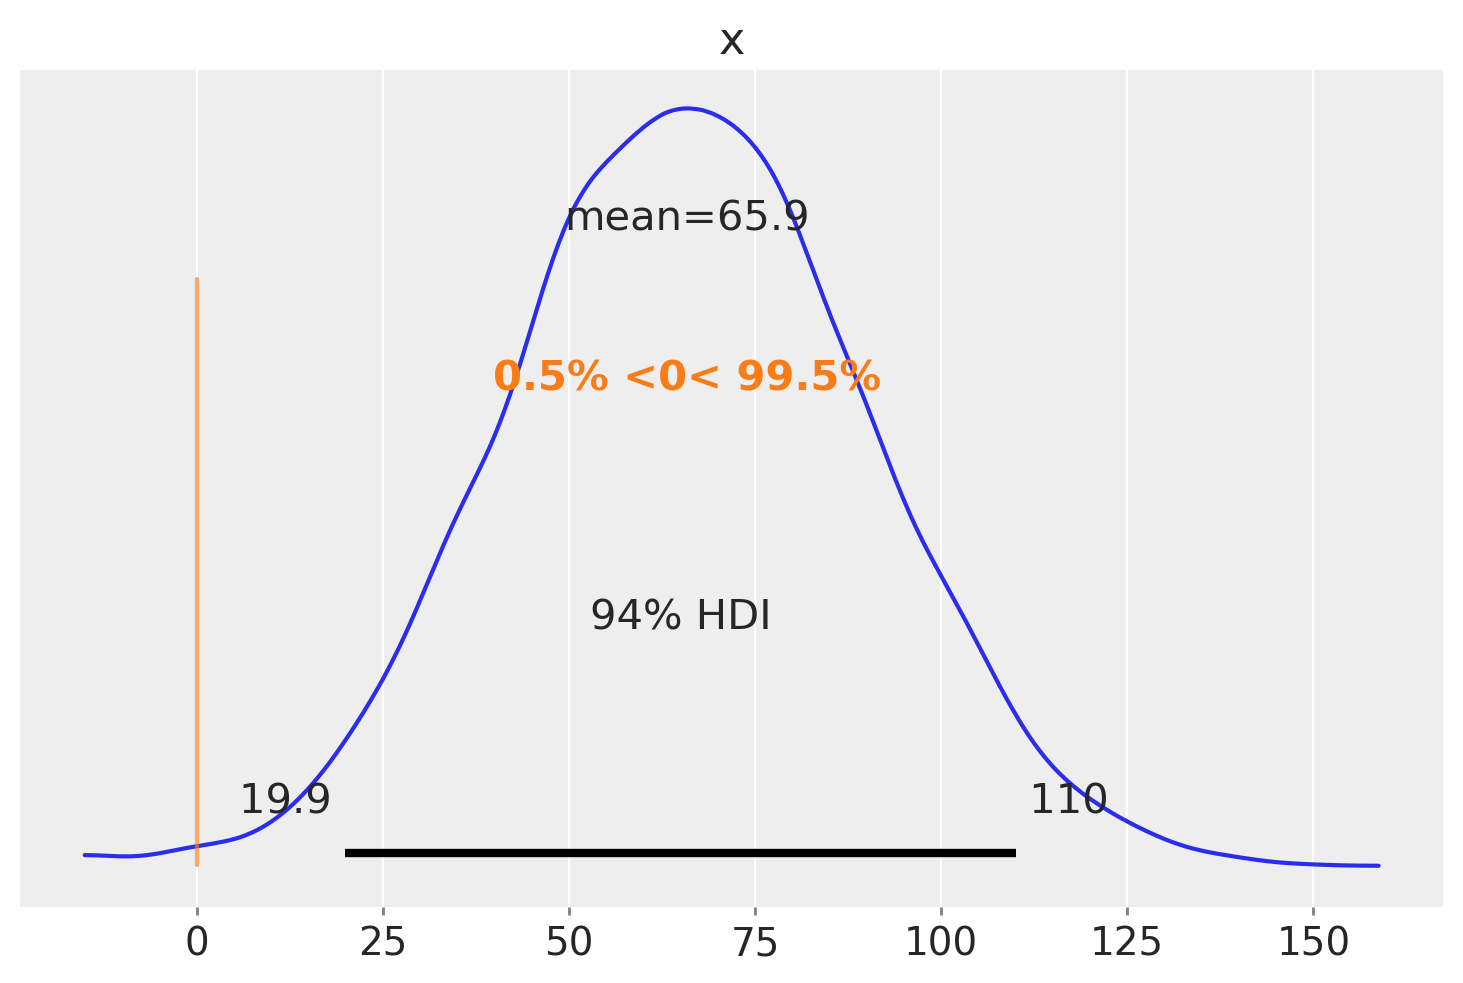

In [21]:
az.plot_posterior(
    result.post_impact.sum("obs_ind"), ref_val=0, hdi_prob=0.94, round_to=3
);

So we could say that the most credible total causal impact of the intervention is around 66, with a 94% credible interval of around 20 to 110.

And if we want precise numerical and summary statistics of that, we can use the `arviz.summary` function:

In [22]:
az.summary(result.post_impact.sum("obs_ind"))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,65.861,24.362,19.889,110.023,0.456,0.351,2861.0,2992.0,1.0


Of course, if we wanted to query the estimated impact over a specific time period, we can leverage the fact that this is an `xarray.DataArray` and we can use the `sel` method to select the time points we are interested in. We will leave this as an exercise for the reader.

Moving on, it would also be possible to look at the mean post-intervention impact estimates, which would give us the average impact of the intervention over the post-intervention period. This can be done using the `mean` method:

In [23]:
az.summary(result.post_impact.mean("obs_ind"))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,1.829,0.677,0.552,3.056,0.013,0.01,2861.0,2992.0,1.0


:::{warning}
Care must be taken with the mean impact statistic. It only makes sense to use this statistic if it looks like the intervention had a lasting (and roughly constant) effect on the outcome variable. If the effect is transient (like in the example here), then clearly there will be a lot of post-intervention period where the impact of the intervention has 'worn off'. If so, then it will be hard to interpret the mean impacts real meaning.

But if there was a roughly constant impact of the intervention over the post-intervention period, then the mean causal impact can be interpreted as the mean impact of the intervention (per time point) over the post-intervention period.
:::

Similarly, if we wanted, we would also be able to query the estimated _cumulative_ impact of the intervention over the post-intervention period by instead looking at the `post_impact_cumulative` attribute, rather than the `post_impact` attribute.